# Importa as bibliotecas necessárias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Lê o arquivo CSV "Churn.csv" usando pandas e define o separador como ';'.

In [ ]:
data = pd.read_csv('Churn.csv', sep = ';')

# Exibe as primeiras 5 linhas do DataFrame.

In [ ]:
data.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Renomeando as colunas do DataFrame.

In [ ]:
data.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

# Criando um gráfico de dispersão para ver as relações entre algumas caracteristicas.


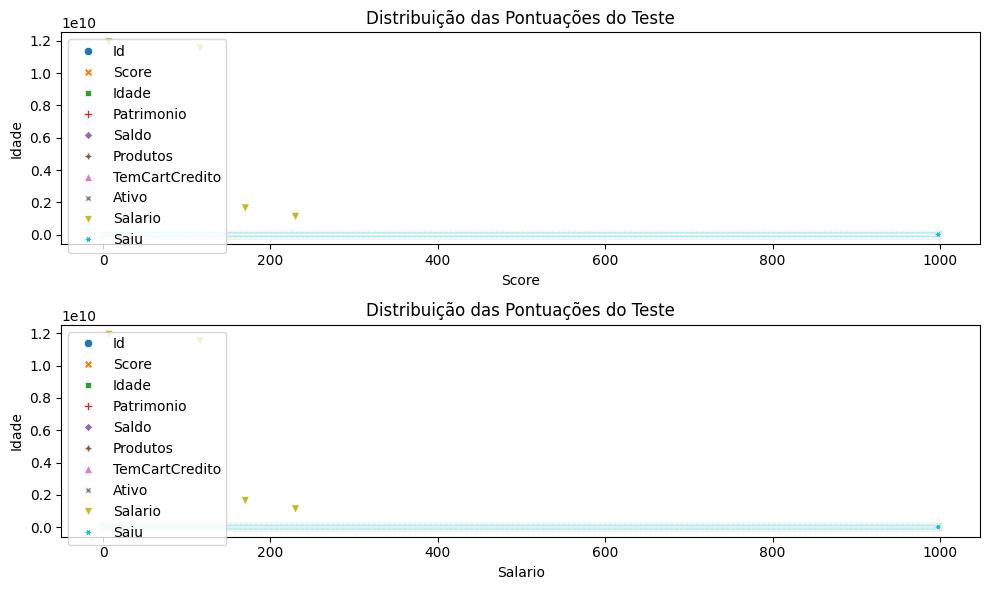

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
sns.scatterplot(data,color='blue')
plt.title("Distribuição das Pontuações do Teste")
plt.xlabel("Score")
plt.ylabel("Idade")
plt.subplot(2,1,2)
sns.scatterplot(data,color='blue')
plt.title("Distribuição das Pontuações do Teste")
plt.xlabel("Salario")
plt.ylabel("Idade")
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Iniciando o pré-processamento.




In [ ]:

data['Saldo'].describe() # Exibindo estatísticas descritivas da coluna 'Saldo'

,Saldo
count,9.990000e+02
mean,7.164928e+06
std,6.311840e+06
min,0.000000e+00
25%,0.000000e+00
50%,8.958835e+06
75%,1.258684e+07
max,2.117743e+07


In [ ]:
data.isnull().sum() # Verifica a quantidade de valores nulos em cada coluna.

,0
Id,0
Score,0
Estado,0
Genero,8
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


In [ ]:
data['Genero'].value_counts() # Verificando a frequência de cada valor na coluna 'Genero'.


,count
Genero,
Masculino,521
Feminino,461
M,6
F,2
Fem,1


In [ ]:
#Substituindo valores na coluna 'Genero', para agrupar de forma mais concisa os valores de genero feminino.
data.loc[data['Genero'].isin(['F', 'Fem']), 'Genero'] = 'Feminino'

In [ ]:
data['Genero'].value_counts()

,count
Genero,
Masculino,521
Feminino,464
M,6


In [ ]:
# Realizando o mesmo processo que fiz com o feminino, dessa vez com o genero masculino.
data.loc[data['Genero'] == 'M', 'Genero'] = 'Masculino'

In [ ]:
data['Genero'].value_counts() #Verificando se as colunas extras foram distribuidas corretamente.

,count
Genero,
Masculino,527
Feminino,464


In [ ]:
agrupado = data.groupby(['Estado']).size() # Agrupando os dados por 'Estado' e contando a frequência de cada estado.
agrupado

,0
Estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


In [ ]:
# Atribuindo os dados de estados inconsistentes a "RS" por meio do uso de moda.
data.loc[data['Estado'].isin(['SP','TD','RP', 'Masculino', 'Feminino']), 'Estado'] = 'RS'

In [ ]:
# Verificando se a atribuição foi feita corretamente.
agrupado = data.groupby(['Estado']).size()
agrupado

,0
Estado,
PR,257
RS,484
SC,258


In [ ]:
# Identificando e exibe as linhas duplicadas com base na coluna 'Id'.
duplicados = data[data['Id'].duplicated()]
duplicados

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [ ]:
data.drop_duplicates(inplace = True) # Removendo as linhas duplicadas.


In [ ]:
# Verificando se as linhas duplicadas foram removidas corretamente.
duplicados = data[data['Id'].duplicated()]
duplicados

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Verificando o numero de linhas e colunas.
data.shape

(998, 12)

In [ ]:
#Verificando se contem algum valor nulo no dataframe.
data.isna().sum()

,0
Id,0
Score,0
Estado,0
Genero,8
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


In [ ]:
#Verificando se contem algum valor nulo na coluna genero.
data['Genero'].isnull().sum()



8

In [ ]:
#Agrupando os dados por genero e contando a frequência de cada valor.
Agrupados = data.groupby(['Genero']).size()
Agrupados


,0
Genero,
Feminino,463
Masculino,527


In [ ]:
#Atribuindo o valor 'Masculino' para linhas onde o 'Genero' é 'RS'.
data.loc[data['Genero'] == 'RS'] = 'Masculino'

In [ ]:
#Verificando se foi atribuido corretamente.
Agrupados = data.groupby(['Genero']).size()
Agrupados

,0
Genero,
Feminino,463
Masculino,527


In [ ]:
# Localizando e preenchendo os valores nulos na coluna 'Genero' com 'Masculino'.
data[data['Genero'].isnull()]
data['Genero'].fillna('Masculino', inplace= True)

In [ ]:
#Verificando se ainda tem algum valor nulo na coluna Genero.
data[data['Genero'].isnull()]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#Verificando se ainda contém valores nulos em alguma coluna do dataframe.
data.isna().sum()

,0
Id,0
Score,0
Estado,0
Genero,0
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


In [ ]:
data.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
#Verificando a descrição da coluna Score.
data['Score'].describe()


,Score
count,998.000000
mean,648.605210
std,98.312117
min,376.000000
25%,580.000000
50%,653.000000
75%,721.000000
max,850.000000


In [ ]:
#Localizando "outliers" tendo como base idades abaixo de 0 e acima de 120 anos.
data.loc[(data['Idade'] <  0 )  | ( data['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
#Removendo esses outliers.
data = data[(data["Idade"]>= 0) & (data["Idade"] <= 120)]

In [ ]:
#Verificando se a remoção foi feita corretamente.
data.loc[(data['Idade'] <  0 )  | ( data['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


# Convertendo as colunas 'Genero' e 'Estado' em valores numéricos usando LabelEncoder.

In [ ]:
encod = LabelEncoder()
data["Genero"] = encod.fit_transform(data["Genero"])
data["Estado"] = encod.fit_transform(data["Estado"])

<ipython-input-36-bb3b0f887c34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Genero"] = encod.fit_transform(data["Genero"])
<ipython-input-36-bb3b0f887c34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Estado"] = encod.fit_transform(data["Estado"])


# Calculando a correlação entre as colunas e a coluna 'Saiu'.

In [ ]:
correlação = data.corr()["Saiu"].sort_values(ascending= True)
correlação

,Saiu
Ativo,-0.210583
Genero,-0.126284
Estado,-0.084055
Score,-0.066300
Patrimonio,-0.057640
Produtos,-0.052983
Id,-0.008897
TemCartCredito,-0.000605
Salario,0.031420
Saldo,0.106224


# Removendo as colunas 'Score' e 'Id' do DataFrame por não considerar úteis para o modelo.

In [ ]:
data = data.drop(['Score', 'Id',], axis = 1)
data

,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,0,42,2,0,1,1,1,10134888.0,1
1,2,0,41,1,8380786,1,0,1,11254258.0,0
2,1,0,42,8,1596608,3,1,0,11393157.0,1
3,1,0,39,1,0,2,0,0,9382663.0,0
4,2,0,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...
994,2,1,43,9,12310588,2,1,0,14576583.0,0
995,2,1,29,9,0,3,0,1,8391224.0,0
996,2,1,44,3,0,2,0,1,7843973.0,0
997,2,1,62,7,12128627,1,0,1,677692.0,0


# Removendo valores nulos do dataframe e atribuindo as variaveis independentes a "x" e a dependente a "y".

In [ ]:
data = data.dropna()
x = data.drop("Saiu", axis = 1)
y = data["Saiu"]
y

,Saiu
0,1
1,0
2,1
3,0
4,0
...,...
994,0
995,0
996,0
997,0


# Instalando a biblioteca imbalanced-learn e aplicando a técnica SMOTE para balancear os dados. Divide os dados em conjuntos de treino e teste.

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE



smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=80)


# Aplicando o StandardScaler para padronizar os dados.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Criando o modelo de Regressão Logistica e o treinando com os dados de treino.

In [ ]:
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

# Realizando a previsão de valores utilizando as caracteristicas previsoras separadas para teste.

In [ ]:

previsao = modelo.predict(x_test)
previsao

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,

# Fazendo o uso de métricas para avaliar o desempenho do modelo.

In [ ]:
# Imprimindo o relatório de classificação, que inclui métricas como precisão, recall, f1-score e suporte para cada classe.
print(classification_report(y_test, previsao))

# Calculando a pontuação (acurácia) do modelo nos dados de teste.
score1 = modelo.score(x_test, y_test)

# Calculando a pontuação (acurácia) do modelo nos dados de treino.
score2 = modelo.score(x_train, y_train)

# Calculando a acurácia do modelo usando a função accuracy_score.
acuracia = accuracy_score(y_test, previsao)

# Imprimindo a pontuação do modelo nos dados de teste.
print(f"o score entre os dados de teste é: {score1}")

# Imprimindo a pontuação do modelo nos dados de treino.
print(f"o score entre os dados de treino é: {score2}")

# Imprimindo a acurácia do modelo.
print(f"A acurácia do modelo é: {acuracia}")



              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.86      0.82      0.84       170

    accuracy                           0.83       316
   macro avg       0.83      0.83      0.83       316
weighted avg       0.83      0.83      0.83       316

o score entre os dados de teste é: 0.8322784810126582
o score entre os dados de treino é: 0.8015873015873016
A acurácia do modelo é: 0.8322784810126582


# Criando um scatterplot simples para visualizar a relação dos que sairam e não sairam com base na idade e saldo em conta.

<ipython-input-71-b864ea33e311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Status'] = data['Saiu'].apply(lambda x: "Saiu" if x else "Não Saiu")


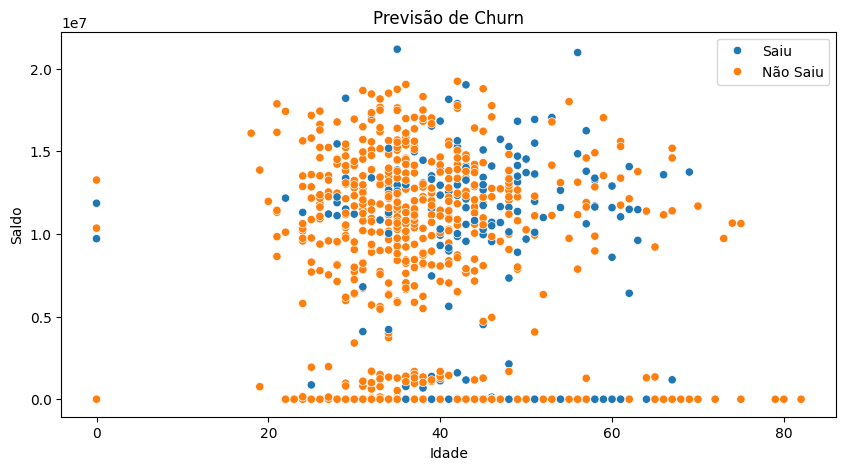

In [71]:
# Criando uma nova coluna 'Status' que indica se o cliente saiu ou não
# Se o valor na coluna 'Saiu' for True, 'Status' recebe "Saiu", caso contrário, recebe "Não Saiu"
data['Status'] = data['Saiu'].apply(lambda x: "Saiu" if x else "Não Saiu")

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Idade', y='Saldo', hue='Status', data=data)
plt.xlabel('Idade')
plt.ylabel('Saldo')
plt.title('Previsão de Churn')
plt.legend()
plt.show()

# Criando um gráfico de pizza para visualizar a relação dos que sairam e não sairam com base nas faixas de idade.

<ipython-input-72-ac67c60330d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Group'] = pd.cut(data['Idade'], bins=[0, 30, 60, 90], labels=['<30', '30-60', '>60'])
<ipython-input-72-ac67c60330d0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = data.groupby(['Age_Group', 'Status'])['Status'].count().unstack()


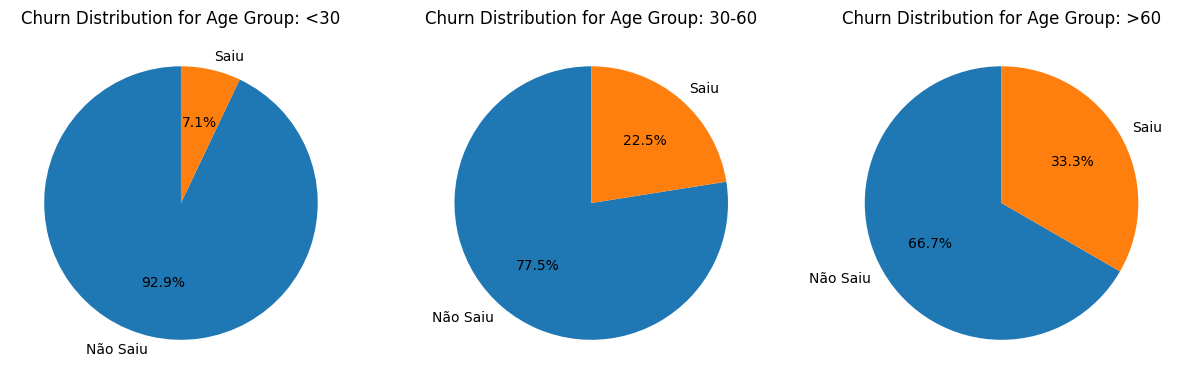

In [72]:

# Definindo faixas etárias
data['Age_Group'] = pd.cut(data['Idade'], bins=[0, 30, 60, 90], labels=['<30', '30-60', '>60'])

# Agrupa por faixa etária e status de churn e conta as ocorrências
age_churn = data.groupby(['Age_Group', 'Status'])['Status'].count().unstack()

# Criando um gráfico de pizza para cada faixa etária
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (age_group, churn_counts) in enumerate(age_churn.iterrows()):
  axes[i].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
  axes[i].set_title(f'Churn Distribution for Age Group: {age_group}')

plt.show()

# Criando um gráfico de pizza para visualizar a relação dos que sairam e não sairam com base nas categorias de saldo.

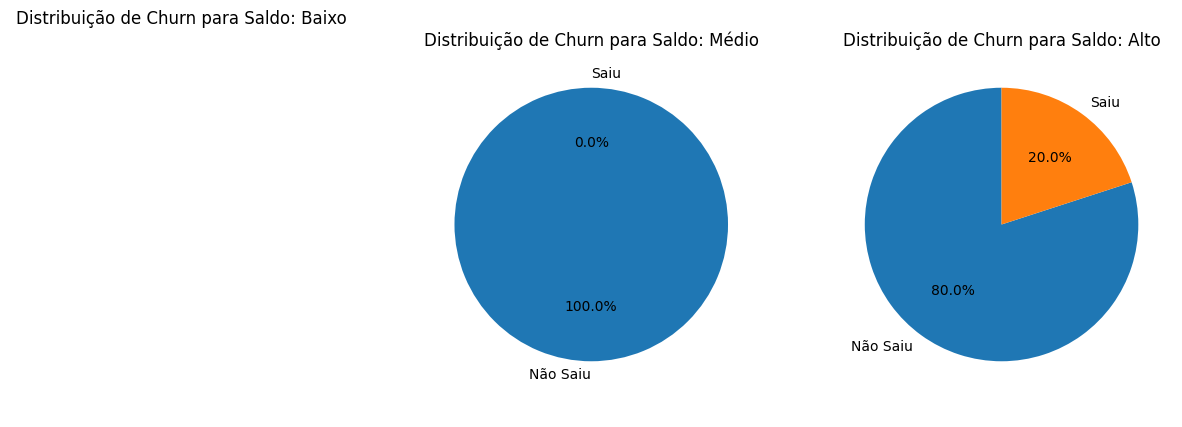

In [77]:
# Criando um gráfico de pizza para cada faixa de saldo
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # Criando uma figura com 3 subplots para os gráficos de pizza

for i, (faixa_saldo, churn_counts) in enumerate(saldo_churn.iterrows()):
  # Iterando sobre as faixas de saldo e seus respectivos dados de churn
  if churn_counts.sum() > 0:  # Verificando se há dados para plotar na faixa de saldo atual
    # Se houver dados, cria o gráfico de pizza
    axes[i].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
  else:
    # Se não houver dados, oculta os eixos do gráfico correspondente
    axes[i].axis('off')
  axes[i].set_title(f'Distribuição de Churn para Saldo: {faixa_saldo}') # Define o título do gráfico

plt.show()